# Reading Rent Flats

This dataset is composed of multiple files where each file corresponds a set of flats of each capital in Spain. For instance, we have the rent flats in Lleida provided by Idealista and we can know different features how price, the location, etc.

Also, the dataset files have one format (json) because the information provided by Idealista is returned in json format.

In [32]:
import io
import json
import requests
from pathlib import Path

import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

## Reading JSON files

Each JSON file available in the dataset is a list where each element contains the information of a single apartment. To read the JSON files as a list of dictionaries in python we use the standard library `json`.

The data will be readed from data/raw directory.



In [2]:
DATA_PATH = Path('../data/raw')

To create the dataset, we performed searches from different location with a radius of 10km, for instance, if we look for an apartment at Tarragona, we locate ourselves at the centre of the city and from there we look flats in a circle of 10km of radius.

Each file contains the flats of a concrete city. We list all the files available in our dataset:

In [14]:
list(map(str, DATA_PATH.glob('*.json')))

['..\\data\\raw\\.gitkeep',
 '..\\data\\raw\\Barna_rent.json',
 '..\\data\\raw\\Girona_rent.json',
 '..\\data\\raw\\Lleida_rent.json',
 '..\\data\\raw\\Madrid_rent.json',
 '..\\data\\raw\\Malaga_rent.json',
 '..\\data\\raw\\Mallorca_rent.json',
 '..\\data\\raw\\Tarragona_rent.json',
 '..\\data\\raw\\Valencia_rent.json',
 '..\\data\\raw\\Zaragoza_rent.json']

From the paths itselves, we can retrieve the city names

In [16]:
def city_from_path(fpath):
    return fpath.stem.split('_')[0]

for p in DATA_PATH.glob('*.json'):
    print(city_from_path(p))

Barna
Girona
Lleida
Madrid
Malaga
Mallorca
Tarragona
Valencia
Zaragoza


For simplicity, some city names are shorten for example *Barna* corresponds to Barcelona. 

Once we determined the path, now we are going to load the JSON file. For example, the rent flats of Lleida.

In [17]:
lleida_flats = DATA_PATH / 'Lleida_rent.json'
data = json.load(lleida_flats.open())

print('Random sample of a Lleida flat:')
print(data[0])

Random sample of a Lleida flat:
{'propertyCode': '86254994', 'thumbnail': 'https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/18/ef/f8/782172025.jpg', 'externalReference': '1587', 'numPhotos': 10, 'price': 550.0, 'propertyType': 'flat', 'operation': 'rent', 'size': 105.0, 'exterior': True, 'rooms': 3, 'bathrooms': 2, 'address': 'Avenida de Rosa Parks', 'province': 'Lleida', 'municipality': 'Lleida', 'district': 'Balafia', 'country': 'es', 'latitude': 41.6281639, 'longitude': 0.6294471, 'showAddress': False, 'url': 'https://www.idealista.com/inmueble/86254994/', 'distance': '2495', 'hasVideo': False, 'newDevelopment': False, 'hasLift': True, 'priceByArea': 5.0, 'detailedType': {'typology': 'flat'}, 'suggestedTexts': {'subtitle': 'Balafia, Lleida', 'title': 'Piso en Avenida de Rosa Parks'}, 'hasPlan': False, 'has3DTour': False, 'has360': False, 'topNewDevelopment': False}


At the json above, we can see some nested JSONs which may be a problem when cleaning the data.

Now, we are going to load them as a `pandas.DataFrame`. Since we have nested JSON structures reading the data with the `json_normalize` function can be pretty handy. `json_normalize` function, normalizes semi-structured JSON data into a flat table.


In [19]:
df = pd.json_normalize(data, sep='_')
df.head()

,propertyCode,thumbnail,externalReference,numPhotos,price,propertyType,operation,size,exterior,rooms,...,topNewDevelopment,detailedType_typology,suggestedTexts_subtitle,suggestedTexts_title,floor,status,parkingSpace_hasParkingSpace,parkingSpace_isParkingSpaceIncludedInPrice,parkingSpace_parkingSpacePrice,detailedType_subTypology
0,86254994,https://img3.idealista.com/blur/WEB_LISTING/0/...,1587,10,550.0,flat,rent,105.0,True,3,...,False,flat,"Balafia, Lleida",Piso en Avenida de Rosa Parks,NaN,NaN,NaN,NaN,NaN,NaN
1,90045751,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,14,650.0,flat,rent,95.0,True,4,...,False,flat,"Universitat, Lleida","Piso en Paseo de Ronda, Lérida",7,good,True,True,NaN,NaN
2,89446908,https://img3.idealista.com/blur/WEB_LISTING/0/...,1029,27,640.0,flat,rent,96.0,True,3,...,False,flat,"Cappont, Lleida","Piso en Calle Riu Besòs, 1",1,good,NaN,NaN,NaN,NaN
3,90027477,https://img3.idealista.com/blur/WEB_LISTING/0/...,SRB_ALTA_SRB_ALTAMIRA_24749,11,550.0,flat,rent,109.0,False,3,...,False,flat,"Princep de Viana-Clot, Lleida",Piso,NaN,NaN,NaN,NaN,NaN,NaN
4,90009506,https://img3.idealista.com/blur/WEB_LISTING/0/...,14400,7,700.0,flat,rent,99.0,True,4,...,False,flat,"Centre Històric, Lleida",Piso en DOLORS LOLIN SABATE s/n,1,good,NaN,NaN,NaN,NaN


We can merge all the content from different cities in spain into a same DataFrame.

In [20]:
data = []
file_list = DATA_PATH.glob('*.json')

for p in file_list:
    jdata = json.load(p.open())
    data.extend(jdata)

df = pd.json_normalize(data, sep='_', )
df.head()

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,has360,topNewDevelopment,detailedType_typology,suggestedTexts_subtitle,suggestedTexts_title,parkingSpace_hasParkingSpace,parkingSpace_isParkingSpaceIncludedInPrice,detailedType_subTypology,parkingSpace_parkingSpacePrice,newDevelopmentFinished
0,88707408,https://img3.idealista.com/blur/WEB_LISTING/0/...,AL_Sants,18,3,1050.0,flat,rent,50.0,True,...,False,False,flat,"Sants, Barcelona","Piso en Calle de Sants, 208",NaN,NaN,NaN,NaN,NaN
1,90050445,https://img3.idealista.com/blur/WEB_LISTING/0/...,AB1508007-1,13,5,3000.0,flat,rent,170.0,True,...,False,False,flat,"Pedralbes, Barcelona",Piso en Avenida Diagonal,True,True,NaN,NaN,NaN
2,89790054,https://img3.idealista.com/blur/WEB_LISTING/0/...,CB_BCN_0286_A,17,4,1050.0,flat,rent,75.0,True,...,False,False,flat,"La Maternitat i Sant Ramon, Barcelona",Piso en Calle del Comandant Benítez,NaN,NaN,NaN,NaN,NaN
3,89813394,https://img3.idealista.com/blur/WEB_LISTING/0/...,CREA1105,16,3,780.0,studio,rent,36.0,True,...,False,False,flat,"La Maternitat i Sant Ramon, Barcelona",Estudio,NaN,NaN,studio,NaN,NaN
4,90050238,https://img3.idealista.com/blur/WEB_LISTING/0/...,6977 OBG,14,1,725.0,flat,rent,65.0,True,...,False,False,flat,"Sant Ildefons, Cornellà de Llobregat",Piso en boix,NaN,NaN,NaN,NaN,NaN


In [21]:
print('Number of rows:', df.shape[0])
print('Number of Columns:', df.shape[1])

Number of rows: 9974
Number of Columns: 40


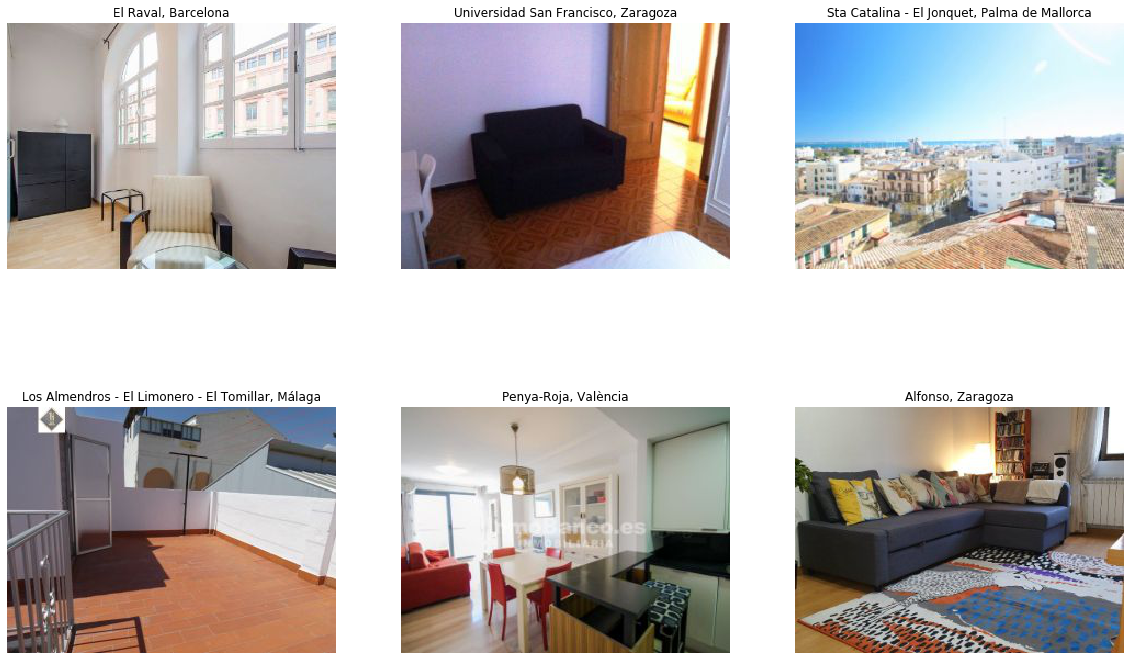

In [37]:
def download_im(url):
    return Image.open(requests.get(flat.thumbnail, stream=True).raw)

random_flats_idx = np.random.randint(0, high=df.shape[0], size=6)

plt.figure(figsize=(20, 20))
for i, idx in enumerate(random_flats_idx, start=1):
    flat = df.iloc[idx]
    plt.subplot(3, 3, i)
    plt.title(flat.suggestedTexts_subtitle)
    plt.imshow(download_im(flat.thumbnail))
    plt.axis('off')
plt.show()


We are done for now, in this notebook we have taken a quick look to the data and learnt how to read it. In the next notebook, we clean and prepare the data for a posterior Exploration Data Analysis (EDA)